In [ ]:
!pip install pycaret-ts-alpha sktime

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from pycaret.time_series import *
from sktime.forecasting.model_selection._split import SlidingWindowSplitter
import time

In [3]:
path = "/content/drive/MyDrive/study/dataset/complete_dataset.csv"
df = pd.read_csv(path, index_col=0, parse_dates=True)
# テストデータの切り離し
df = df.loc[: "2018-12-31"]
df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


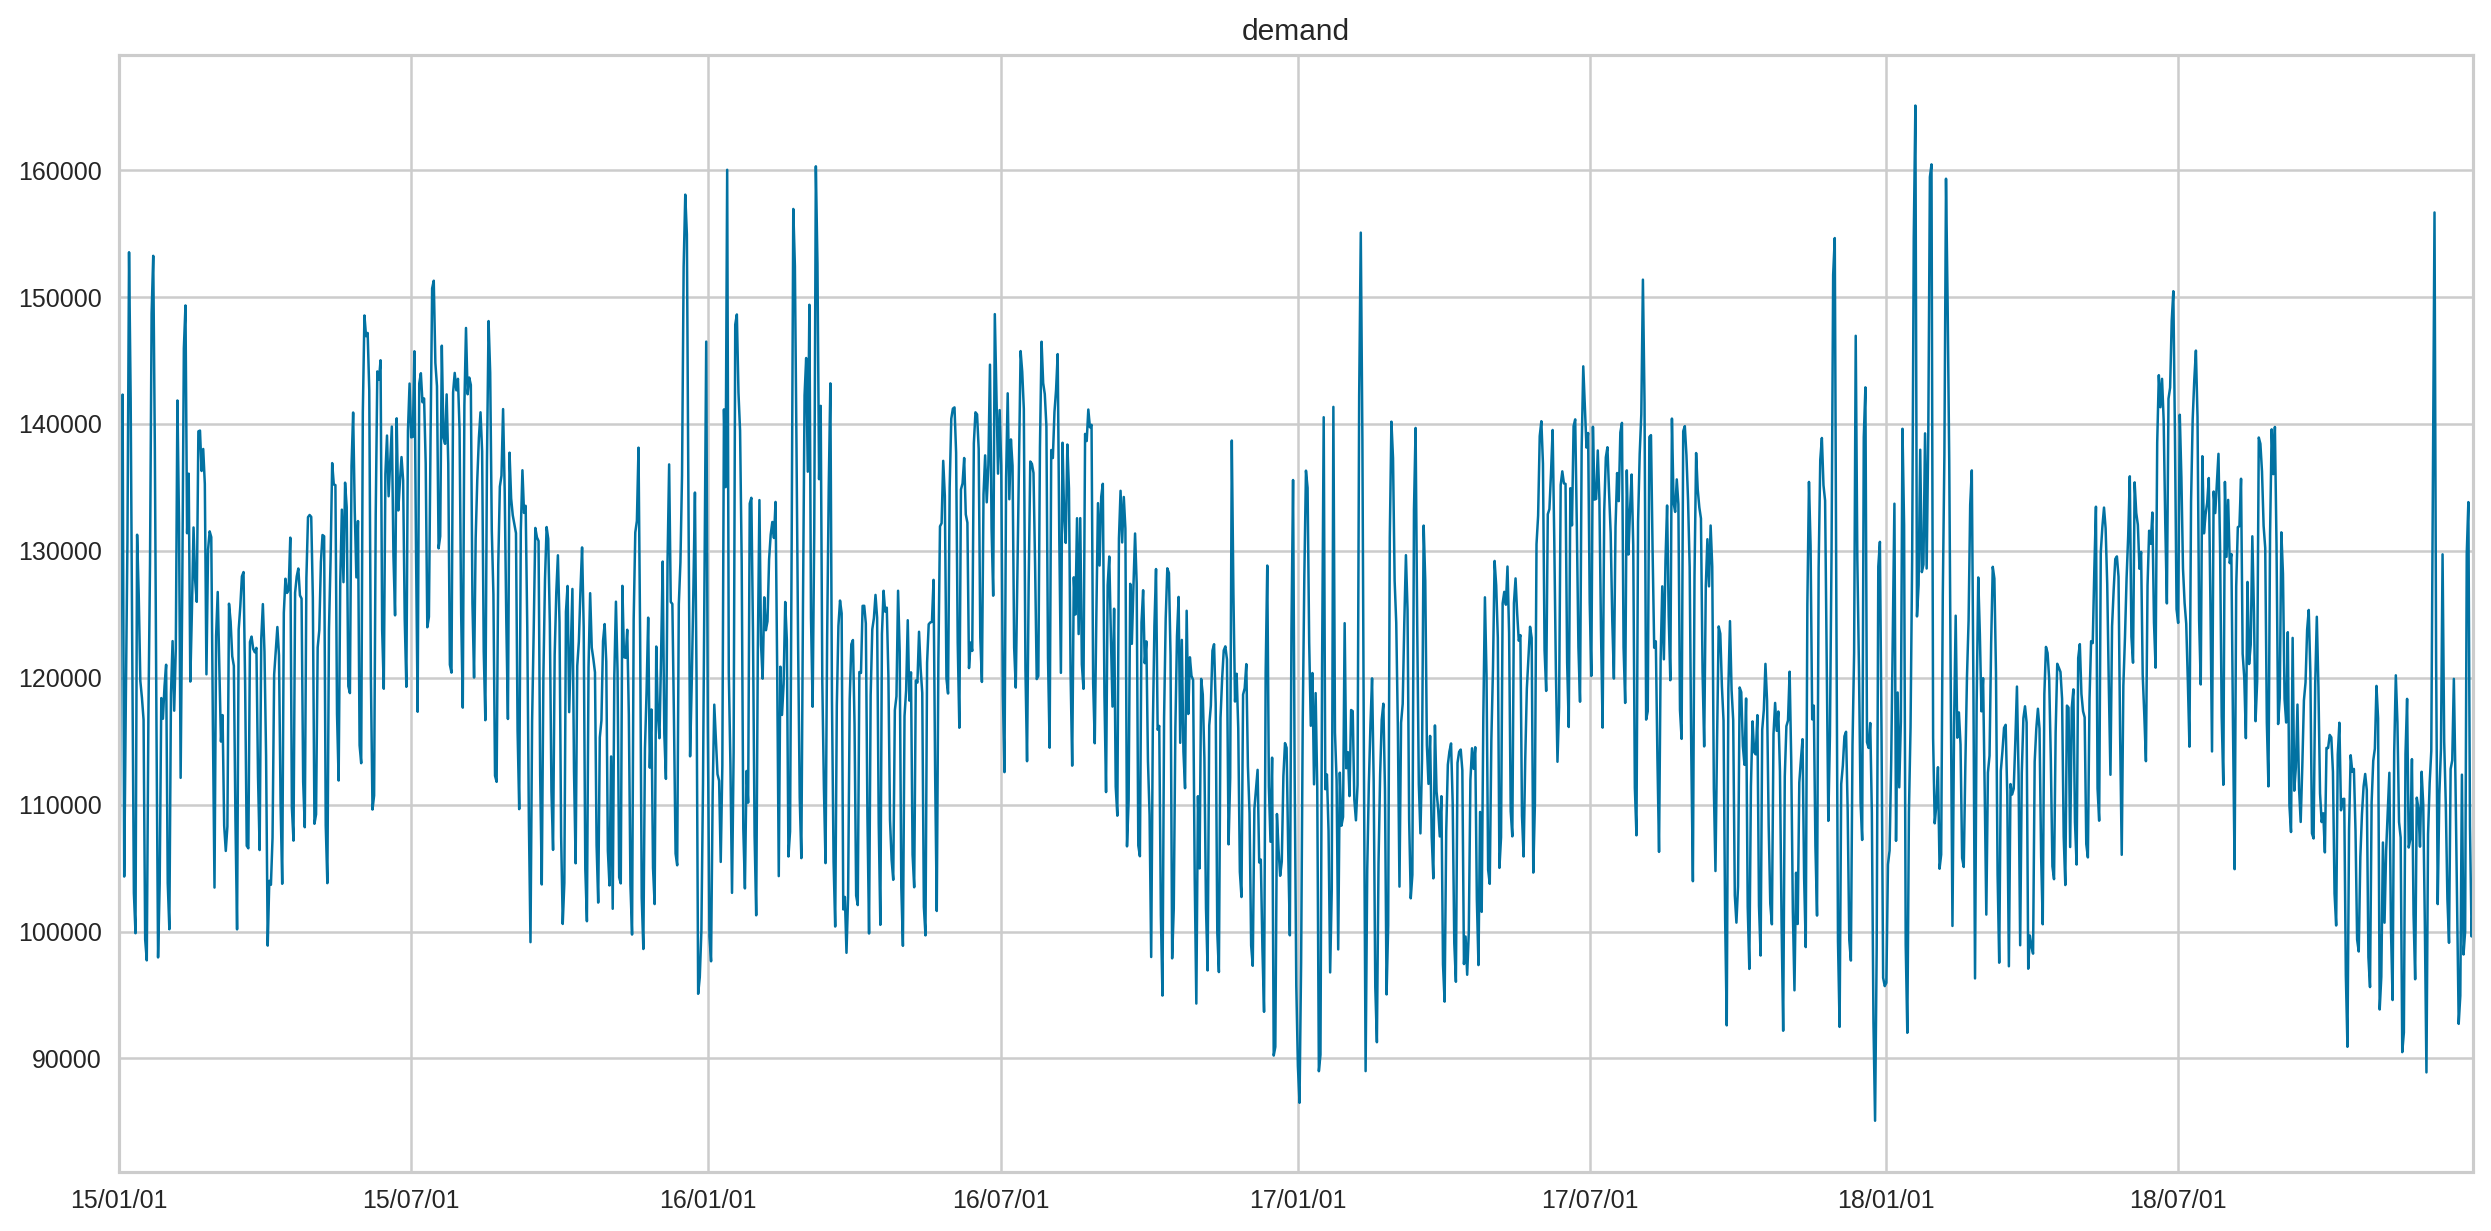

In [4]:
target = 'demand'

fig = plt.figure(figsize=(14, 7), dpi=180)
x = df.index
y = df[target].to_numpy()
title = target
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1.0)
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
ax.set_xlim(x[0], x[-1])
ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.show()
plt.close()

In [5]:
df.columns

Index(['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP',
       'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday'],
      dtype='object')

In [6]:
# カテゴリ変数の変換
df["holiday"] = df["holiday"].map({'N': 0, 'Y': 1})
df["school_day"] = df["school_day"].map({'N': 0, 'Y': 1})

In [7]:
# 欠損値のチェック
df.isnull().sum()

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

In [8]:
# 実験の設定
# window_length：学習期間、 fh ：検証期間、step_length：ずらす量
my_custom_cv = SlidingWindowSplitter(fh=np.arange(1, 366), window_length=365, step_length=365)
setup(
    data=df, # データ
    target = "demand", 
    ignore_features = ['RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP'], 
    numeric_imputation_exogenous = "linear", 
    scale_target = "zscore", 
    scale_exogenous = "zscore",
    fold_strategy = my_custom_cv,
    fh = np.arange(2, 3),  # 2日先予測
    seasonal_period = 'D',
    verbose = False,
    session_id = 13
    )

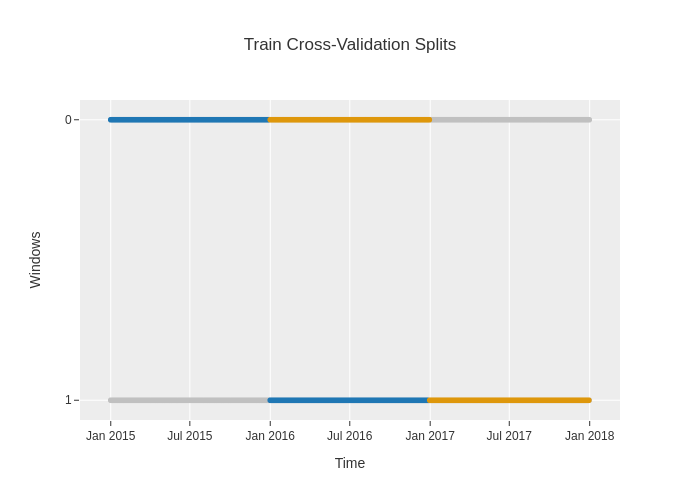

In [9]:
# cvのやり方をプロット
plot_model(plot="cv")

compare_modelsで全てのモデルでの精度を比較

In [10]:
start = time.time()
best = compare_models(sort = 'MAPE')
elapsed_time = time.time() - start

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,7793.9516,10334.7566,0.0643,0.0654,1.0067,0.9502,0.4141,18.900
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,8275.3496,11018.1871,0.0677,0.0702,1.0708,1.0159,0.3287,19.180
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize...,8580.256,11600.1276,0.0713,0.0724,1.1075,1.0655,0.2633,0.510
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,9102.6113,11865.0991,0.0749,0.0763,1.172,1.0872,0.2311,0.300
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,9365.0219,12133.6515,0.0773,0.0786,1.2065,1.1125,0.1956,0.310
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,9401.3951,12443.9708,0.0776,0.0794,1.212,1.1427,0.1524,0.325
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Det...,9508.1808,12475.5194,0.0792,0.0793,1.2199,1.1346,0.1407,0.565
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,9812.2298,11913.2353,0.0809,0.0819,1.2659,1.0966,0.2192,0.315
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,9812.2298,11913.2353,0.0809,0.0819,1.2659,1.0966,0.2192,0.310
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,9812.2298,11913.2353,0.0809,0.0819,1.2659,1.0966,0.2192,0.300


In [11]:
print("compare_modelsにかかった時間:{0}".format(elapsed_time) + "[sec]")

compare_modelsにかかった時間:263.2138991355896[sec]


In [12]:
print(best)

BaseCdsDtForecaster(regressor=KNeighborsRegressor(n_jobs=-1), sp=7,
                    window_length=7)


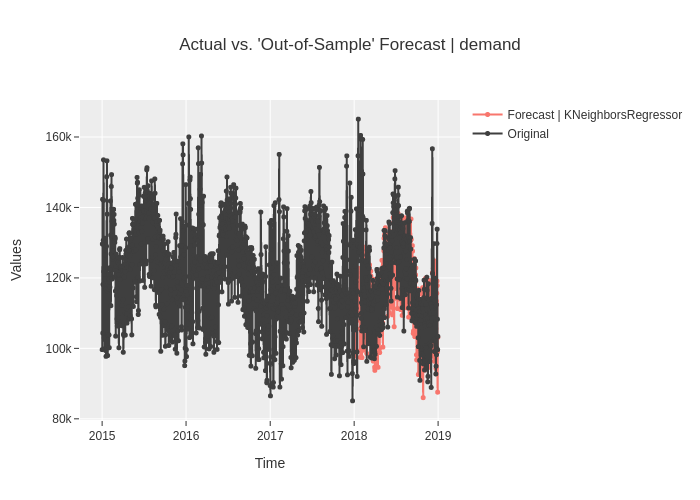

In [13]:
plot_model(best, plot="forecast")

lightGBMをチューニング

In [15]:
my_custom_cv = SlidingWindowSplitter(fh=np.arange(1, 366), window_length=365, step_length=365)
setup(
    data=df, # データ
    target = "demand", # 目的変数
    ignore_features = ['RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP'],
    numeric_imputation_exogenous = "linear",
    scale_target = "zscore",
    scale_exogenous = "zscore",
    fold_strategy = my_custom_cv,
    fh = np.arange(2, 3), 
    seasonal_period = 'D',
    verbose = False,
    session_id = 13
    )
lgbm = create_model('lightgbm_cds_dt')
print(lgbm)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2015-12-31,7645.0208,10690.5942,0.0647,0.0625,0.9505,0.9153,0.3587
1,2016-12-30,9515.4911,12509.6611,0.0779,0.0823,1.2644,1.2156,0.1678
Mean,NaT,8580.2560,11600.1276,0.0713,0.0724,1.1075,1.0655,0.2633
SD,NaT,935.2351,909.5334,0.0066,0.0099,0.1570,0.1501,0.0955


BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7)


In [16]:
tuned_lgbm = tune_model(lgbm) 
print(tuned_lgbm)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2015-12-31,8914.2599,10591.4894,0.0745,0.0731,1.1083,0.9069,0.3705
1,2016-12-30,10771.0965,13301.5689,0.0880,0.0912,1.4313,1.2925,0.0591
Mean,NaT,9842.6782,11946.5291,0.0812,0.0822,1.2698,1.0997,0.2148
SD,NaT,928.4183,1355.0397,0.0068,0.0090,0.1615,0.1928,0.1557


BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7)


In [17]:
final_lgbm = finalize_model(tuned_lgbm)

In [18]:
print(final_lgbm)

BaseCdsDtForecaster(regressor=LGBMRegressor(random_state=13), sp=7,
                    window_length=7)


In [19]:
?predict_model()

In [20]:
df_test = pd.read_csv(path, index_col=0, parse_dates=True)
df_test["holiday"] = df_test["holiday"].map({'N': 0, 'Y': 1})
df_test["school_day"] = df_test["school_day"].map({'N': 0, 'Y': 1})
X_test = df_test.loc["2019-01-01" : "2019-12-31"].drop(["demand", 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP'], axis=1)
X_test.head()

,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,
2019-01-01,15.5,26.2,31.7,0.0,0,1
2019-01-02,18.4,22.2,26.3,0.0,0,0
2019-01-03,15.9,29.5,27.6,0.0,0,0
2019-01-04,18.0,42.6,27.4,0.0,0,0
2019-01-05,17.4,21.2,12.9,0.4,0,0


In [21]:
y_pred = predict_model(final_lgbm, X=X_test)["y_pred"].to_numpy()

In [22]:
len(y), len(y_pred)

(1461, 365)

CORR：0.6827780363282006
RMSE：11256.274597301315
MAE：7646.916701095891
MAPE：0.06370270312793568


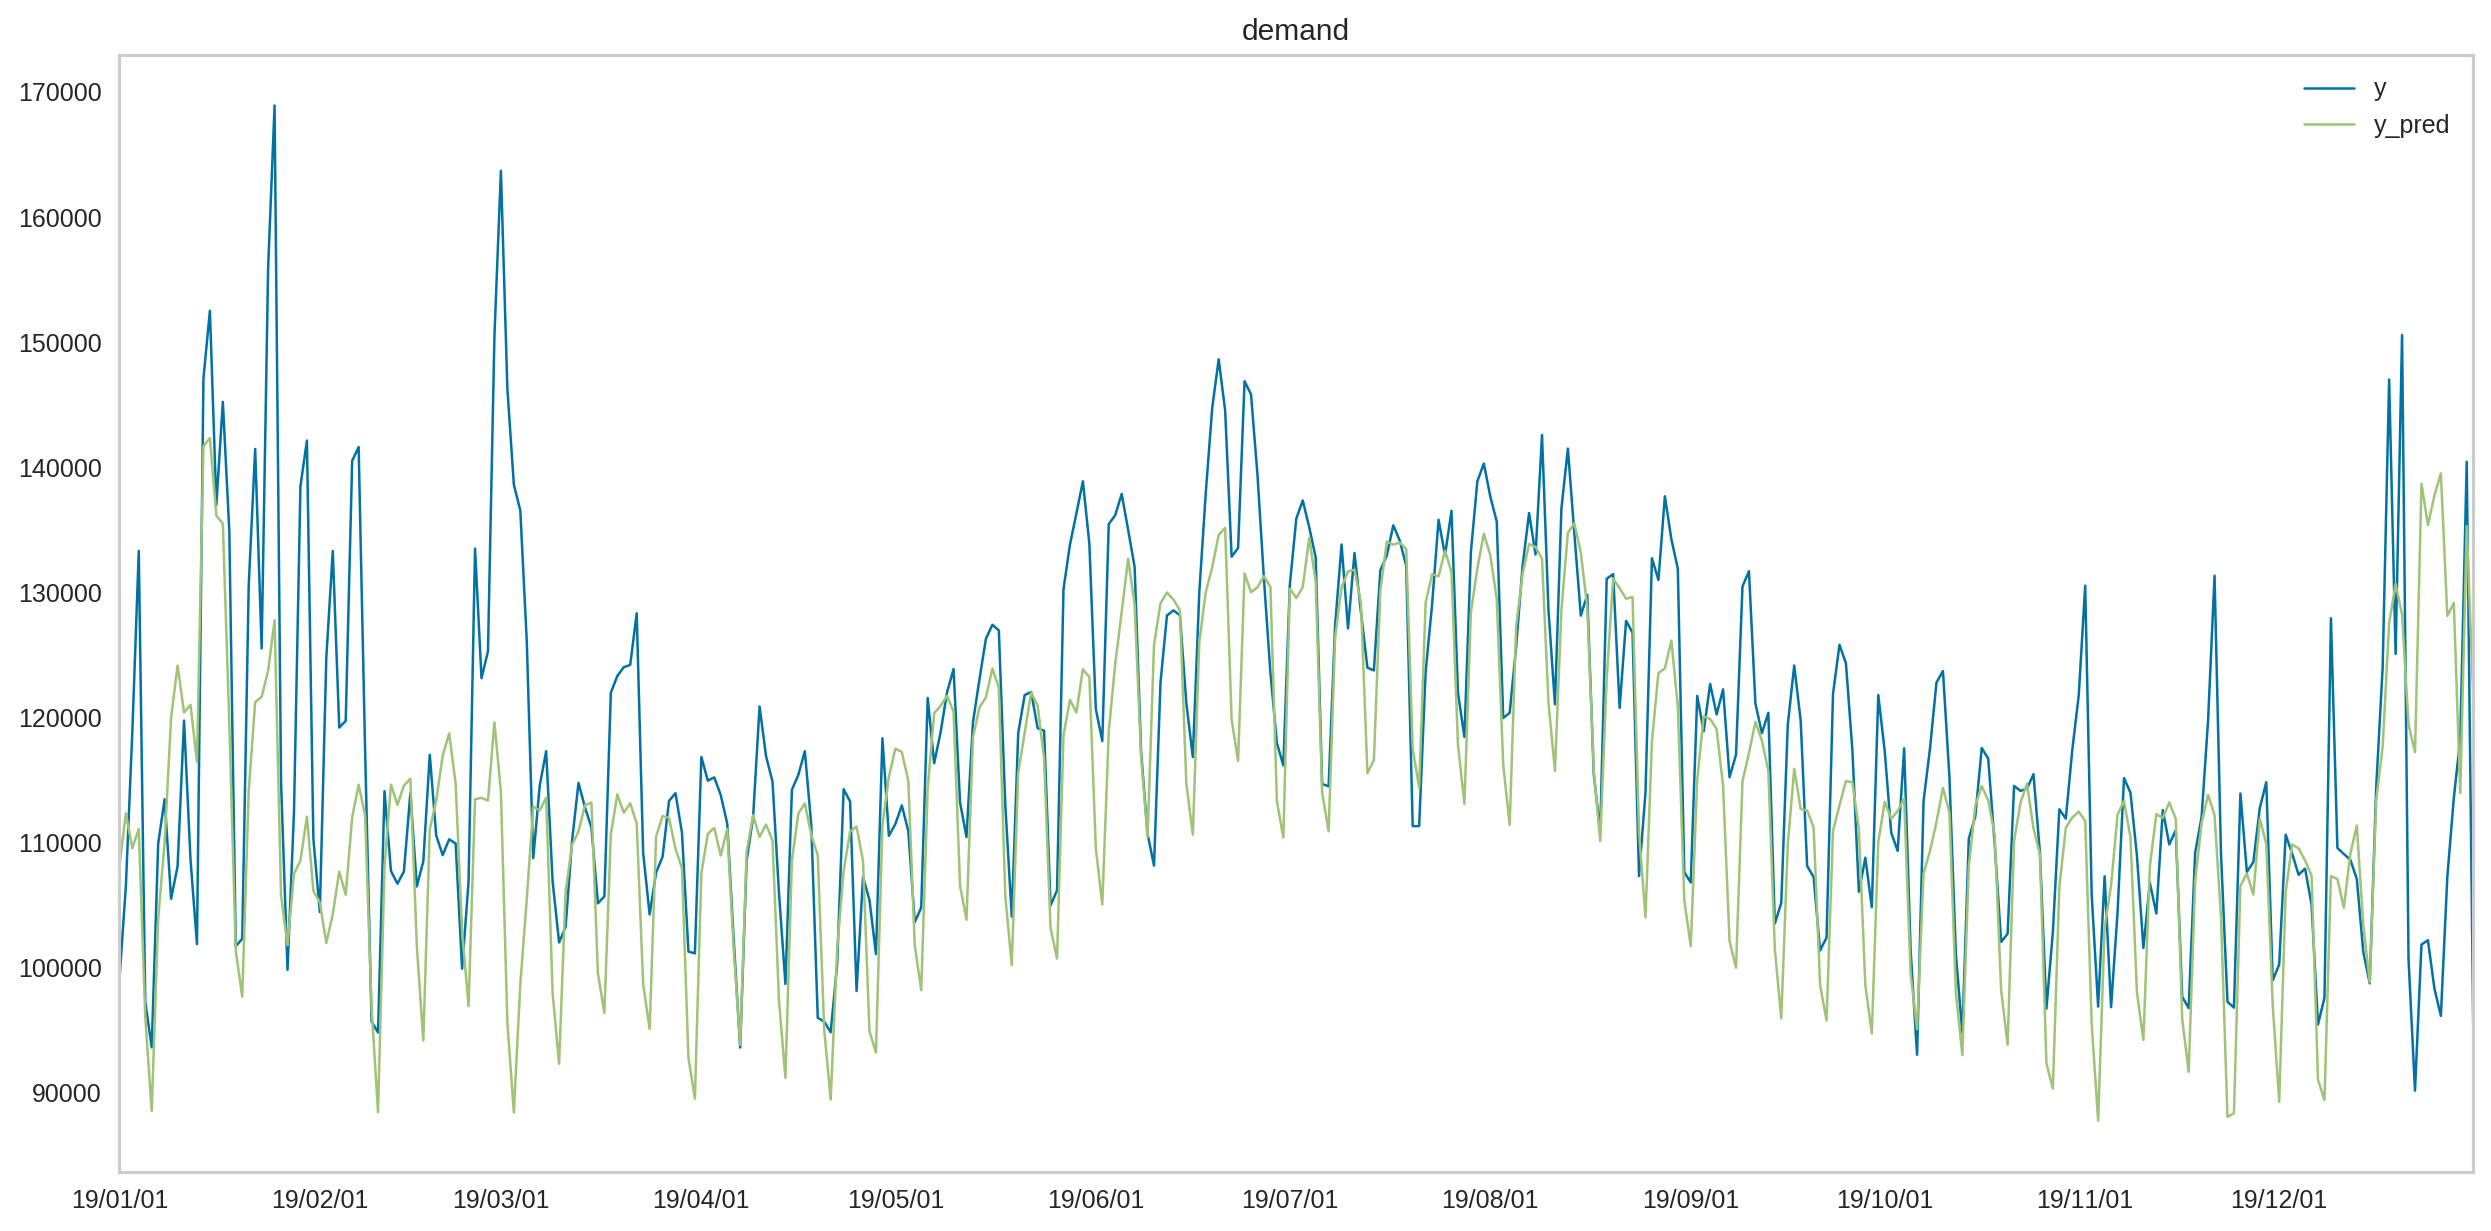

In [23]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.metrics import mean_squared_error, mean_absolute_error,  mean_absolute_percentage_error

x = df_test.loc["2019-01-01" : "2019-12-31"].index
y = df_test.loc["2019-01-01" : "2019-12-31"]["demand"].to_numpy()

corr = np.corrcoef(y, y_pred)[0][1]
print(f"CORR：{corr}")
rmse = mean_squared_error(y, y_pred, squared=False)
print(f"RMSE：{rmse}")
mae = mean_absolute_error(y, y_pred)
print(f"MAE：{mae}")
mape = mean_absolute_percentage_error(y, y_pred)
print(f"MAPE：{mape}")

fig = plt.figure(figsize=(14, 7), dpi=180)
title = "demand"
ax = fig.add_subplot(111)
ax.plot(x, y, linewidth=1.0, label='y')
ax.plot(x, y_pred, linewidth=1.0, label="y_pred")
ax.xaxis.set_major_formatter(DateFormatter("%y/%m/%d"))
ax.set_xlim(x[0], x[-1])
ax.set_title(title, fontsize=12)
fig.tight_layout()
plt.legend()
plt.grid()
plt.show()
plt.close()